### Based on Fullfillment Status is fulfilled only fulfilled at

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the Excel file
file_path = 'July_orders_to_aug8.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the data to understand its structure
data.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 1 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
0,TREU31879,pjv6mxpljypydzw@marketplace.amazon.de,paid,2024-07-31 23:13:06 +0200,fulfilled,2024-08-01 11:13:31 +0200,no,EUR,48.99,10.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TREU31879.1
1,TREU31878,neil.ocallaghan@gmail.com,paid,2024-07-31 22:48:07 +0200,fulfilled,2024-08-01 11:13:39 +0200,yes,EUR,346.64,26.24,...,69.73,NaN,NaN,NaN,Dublin,Dublin,rYwCNuJFAwgI2sOhrz6fqwtzc,NaN,NaN,rYwCNuJFAwgI2sOhrz6fqwtzc
2,TREU31877,repabali@gmail.com,paid,2024-07-31 22:30:56 +0200,fulfilled,2024-08-01 11:13:37 +0200,no,EUR,564.68,74.84,...,135.96,NaN,NaN,NaN,NaN,NaN,ryqwtncGZwKLMrXSrNNRa0UQb,NaN,NaN,ryqwtncGZwKLMrXSrNNRa0UQb
3,TREU31877,repabali@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TREU31876,285swwxm6p16z10@marketplace.amazon.de,paid,2024-07-31 22:13:11 +0200,fulfilled,2024-08-01 10:13:31 +0200,no,EUR,249.00,12.48,...,NaN,4.935838e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TREU31876.1


In [82]:
# Ensure 'Fulfilled at' is treated as datetime
data['Fulfilled at'] = pd.to_datetime(data['Fulfilled at'], errors='coerce')

# Filter orders where Fulfillment Status is fulfilled and Fulfilled at is on or before 2024-07-31
filtered_orders = data[(data['Fulfillment Status'] == 'fulfilled') & (data['Fulfilled at'] >= '2024-07-01') & (data['Fulfilled at'] <= '2024-08-01')]

# Categorize Shipping Method
def categorize_shipping_method(method):
    if pd.isna(method):
        return 'Unknown'
    method = method.lower()
    if method.startswith('fedex'):
        return 'Fedex'
    elif method.startswith('ups'):
        return 'UPS'
    elif method.startswith('standard'):
        return 'amazon'
    elif method.startswith('free'):
        return 'FREE'
    else:
        return 'Other'

# Apply the categorization to the filtered data
filtered_orders['Shipping Method Category'] = filtered_orders['Shipping Method'].apply(categorize_shipping_method)

# Verify the categorization
categorized_methods = filtered_orders['Shipping Method Category'].unique()

# Display the first few rows of the modified dataframe and unique categories
filtered_orders.head(), categorized_methods


C:\Users\olcay\AppData\Local\Temp\ipykernel_19944\3550777226.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_orders['Shipping Method Category'] = filtered_orders['Shipping Method'].apply(categorize_shipping_method)


(         Name                                  Email Financial Status  \
 25  TREU31867                      slcracer81@aol.de             paid   
 27  TREU31865              frankhendriks@outlook.com             paid   
 38  TREU31859                     xmlehelp@gmail.com             paid   
 40  TREU31858  mdjgwynflrm0qcr@marketplace.amazon.it             paid   
 41  TREU31857  2gxdvjlt2fq3mbf@marketplace.amazon.it             paid   
 
                       Paid at Fulfillment Status              Fulfilled at  \
 25  2024-07-31 14:40:19 +0200          fulfilled 2024-07-31 16:11:59+02:00   
 27  2024-07-31 14:18:13 +0200          fulfilled 2024-07-31 16:12:01+02:00   
 38                        NaN          fulfilled 2024-07-31 20:12:20+02:00   
 40  2024-07-31 10:57:33 +0200          fulfilled 2024-07-31 12:11:38+02:00   
 41  2024-07-31 10:52:32 +0200          fulfilled 2024-07-31 12:11:36+02:00   
 
    Accepts Marketing Currency  Subtotal  Shipping  ...         Phone  \
 25  

In [83]:
filtered_orders['Shipping Method Category'].value_counts()

Shipping Method Category
Fedex      390
UPS        215
amazon      84
FREE        24
Other       23
Unknown      8
Name: count, dtype: int64

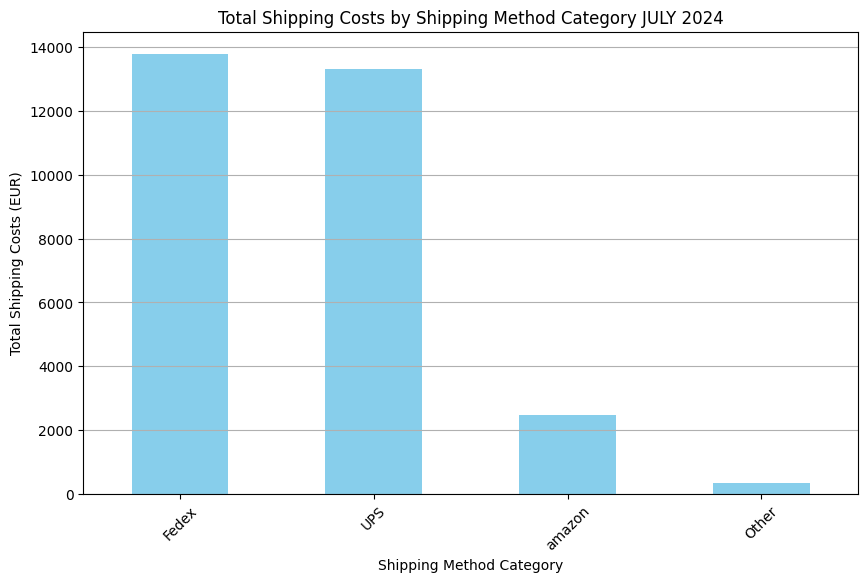

In [84]:
# Remove rows with Shipping Method Category as 'Unknown' and 'FREE'
filtered_orders_valid = filtered_orders[~filtered_orders['Shipping Method Category'].isin(['Unknown', 'FREE'])]

# Group by Shipping Method Category and calculate the total shipping cost for each category
shipping_costs_valid = filtered_orders_valid.groupby('Shipping Method Category')['Shipping'].sum()

# Reorder the index to have Fedex, UPS, Amazon, and Other in the specified order
ordered_shipping_costs = shipping_costs_valid[['Fedex', 'UPS', 'amazon', 'Other']]

# Plot the shipping costs for each category
plt.figure(figsize=(10, 6))
ordered_shipping_costs.plot(kind='bar', color='skyblue')
plt.title('Total Shipping Costs by Shipping Method Category JULY 2024')
plt.xlabel('Shipping Method Category')
plt.ylabel('Total Shipping Costs (EUR)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


In [85]:
# Calculate and summarize shipping costs, reorder, and add total row in a shortened manner
total_shipping_costs = filtered_orders_valid.groupby('Shipping Method Category')['Shipping'].sum()
total_shipping_cost = total_shipping_costs.sum()
shipping_cost_summary = pd.DataFrame({
    'Total Shipping Cost (EUR)': total_shipping_costs,
    'Percentage of Total Shipping Cost (%)': (total_shipping_costs / total_shipping_cost) * 100
}).reindex(['Fedex', 'UPS', 'amazon', 'Other'])

# Add total row
total_row = pd.DataFrame({'Total Shipping Cost (EUR)': [total_shipping_cost], 'Percentage of Total Shipping Cost (%)': [100.0]}, index=['Total'])
ordered_shipping_cost_summary = pd.concat([shipping_cost_summary, total_row])

ordered_shipping_cost_summary


,Total Shipping Cost (EUR),Percentage of Total Shipping Cost (%)
Fedex,13799.31,46.114508
UPS,13310.73,44.481772
amazon,2468.97,8.250799
Other,345.00,1.152920
Total,29924.01,100.000000


In [80]:
# UPS Total Shipping Cost
# July_total_loss = ups_shipping_cost = ordered_shipping_cost_summary.loc['UPS', 'Total Shipping Cost (EUR)'] - 39367
# July_total_loss # take into account amazon

np.float64(-19915.11)

### `FEDEX`

In [52]:
# Load the CSV file
file_path = 'orders_export_1.csv'
orders_df = pd.read_csv(file_path)

# Save the DataFrame as an Excel file
excel_file_path = 'JUNE_JULY_orders.xlsx'
orders_df.to_excel(excel_file_path, index=False)

excel_file_path

'JUNE_JULY_orders.xlsx'

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the Excel file
file_path = 'JUNE_JULY_orders.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the data to understand its structure
data.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
0,TREU31879,pjv6mxpljypydzw@marketplace.amazon.de,paid,2024-07-31 23:13:06 +0200,fulfilled,2024-08-01 11:13:31 +0200,no,EUR,48.99,10.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TREU31879.1
1,TREU31878,neil.ocallaghan@gmail.com,paid,2024-07-31 22:48:07 +0200,fulfilled,2024-08-01 11:13:39 +0200,yes,EUR,346.64,26.24,...,NaN,NaN,NaN,NaN,Dublin,Dublin,rYwCNuJFAwgI2sOhrz6fqwtzc,NaN,NaN,rYwCNuJFAwgI2sOhrz6fqwtzc
2,TREU31877,repabali@gmail.com,paid,2024-07-31 22:30:56 +0200,fulfilled,2024-08-01 11:13:37 +0200,no,EUR,564.68,74.84,...,NaN,NaN,NaN,NaN,NaN,NaN,ryqwtncGZwKLMrXSrNNRa0UQb,NaN,NaN,ryqwtncGZwKLMrXSrNNRa0UQb
3,TREU31877,repabali@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TREU31876,285swwxm6p16z10@marketplace.amazon.de,paid,2024-07-31 22:13:11 +0200,fulfilled,2024-08-01 10:13:31 +0200,no,EUR,249.00,12.48,...,NaN,4.935838e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TREU31876.1


In [54]:
# Ensure 'Fulfilled at' is treated as datetime
data['Fulfilled at'] = pd.to_datetime(data['Fulfilled at'], errors='coerce')

# Filter orders where Fulfillment Status is fulfilled and Fulfilled at is on or before 2024-07-31
filtered_orders = data[(data['Fulfillment Status'] == 'fulfilled') & (data['Fulfilled at'] >= '2024-06-15') & (data['Fulfilled at'] <= '2024-08-01')]

# Categorize Shipping Method
def categorize_shipping_method(method):
    if pd.isna(method):
        return 'Unknown'
    method = method.lower()
    if method.startswith('fedex'):
        return 'Fedex'
    elif method.startswith('ups'):
        return 'UPS'
    elif method.startswith('standard'):
        return 'amazon'
    elif method.startswith('free'):
        return 'FREE'
    else:
        return 'Other'

# Apply the categorization to the filtered data
filtered_orders['Shipping Method Category'] = filtered_orders['Shipping Method'].apply(categorize_shipping_method)

# Verify the categorization
categorized_methods = filtered_orders['Shipping Method Category'].unique()

# Display the first few rows of the modified dataframe and unique categories
filtered_orders.head(), categorized_methods


C:\Users\olcay\AppData\Local\Temp\ipykernel_19944\1101654550.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_orders['Shipping Method Category'] = filtered_orders['Shipping Method'].apply(categorize_shipping_method)


(         Name                                  Email Financial Status  \
 25  TREU31867                      slcracer81@aol.de             paid   
 27  TREU31865              frankhendriks@outlook.com             paid   
 38  TREU31859                     xmlehelp@gmail.com             paid   
 40  TREU31858  mdjgwynflrm0qcr@marketplace.amazon.it             paid   
 41  TREU31857  2gxdvjlt2fq3mbf@marketplace.amazon.it             paid   
 
                       Paid at Fulfillment Status              Fulfilled at  \
 25  2024-07-31 14:40:19 +0200          fulfilled 2024-07-31 16:11:59+02:00   
 27  2024-07-31 14:18:13 +0200          fulfilled 2024-07-31 16:12:01+02:00   
 38                        NaN          fulfilled 2024-07-31 20:12:20+02:00   
 40  2024-07-31 10:57:33 +0200          fulfilled 2024-07-31 12:11:38+02:00   
 41  2024-07-31 10:52:32 +0200          fulfilled 2024-07-31 12:11:36+02:00   
 
    Accepts Marketing Currency  Subtotal  Shipping  ...         Phone  \
 25  

In [55]:
filtered_orders['Shipping Method Category'].value_counts()

Shipping Method Category
Fedex      700
UPS        434
amazon     135
Other       54
FREE        33
Unknown     12
Name: count, dtype: int64

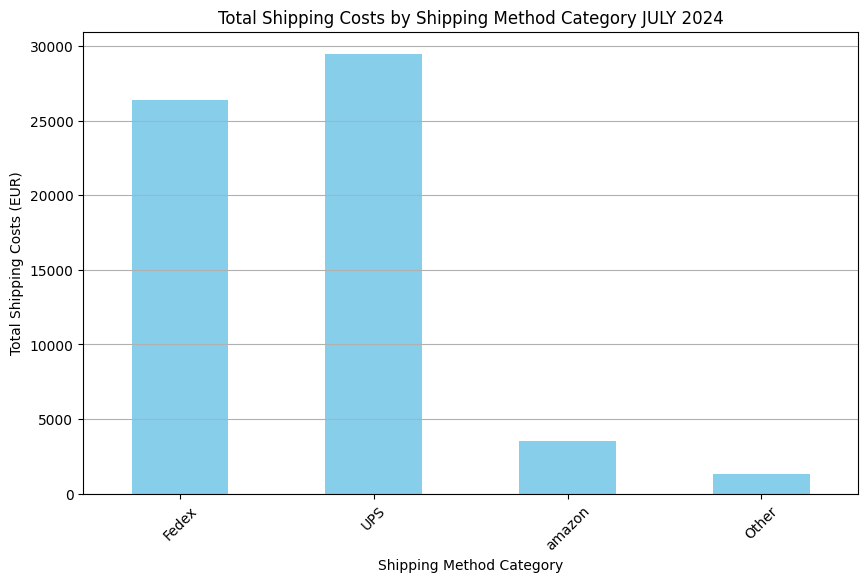

In [56]:
# Remove rows with Shipping Method Category as 'Unknown' and 'FREE'
filtered_orders_valid = filtered_orders[~filtered_orders['Shipping Method Category'].isin(['Unknown', 'FREE'])]

# Group by Shipping Method Category and calculate the total shipping cost for each category
shipping_costs_valid = filtered_orders_valid.groupby('Shipping Method Category')['Shipping'].sum()

# Reorder the index to have Fedex, UPS, Amazon, and Other in the specified order
ordered_shipping_costs = shipping_costs_valid[['Fedex', 'UPS', 'amazon', 'Other']]

# Plot the shipping costs for each category
plt.figure(figsize=(10, 6))
ordered_shipping_costs.plot(kind='bar', color='skyblue')
plt.title('Total Shipping Costs by Shipping Method Category JULY 2024')
plt.xlabel('Shipping Method Category')
plt.ylabel('Total Shipping Costs (EUR)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


In [57]:
# Calculate and summarize shipping costs, reorder, and add total row in a shortened manner
total_shipping_costs = filtered_orders_valid.groupby('Shipping Method Category')['Shipping'].sum()
total_shipping_cost = total_shipping_costs.sum()
shipping_cost_summary = pd.DataFrame({
    'Total Shipping Cost (EUR)': total_shipping_costs,
    'Percentage of Total Shipping Cost (%)': (total_shipping_costs / total_shipping_cost) * 100
}).reindex(['Fedex', 'UPS', 'amazon', 'Other'])

# Add total row
total_row = pd.DataFrame({'Total Shipping Cost (EUR)': [total_shipping_cost], 'Percentage of Total Shipping Cost (%)': [100.0]}, index=['Total'])
ordered_shipping_cost_summary = pd.concat([shipping_cost_summary, total_row])

ordered_shipping_cost_summary


,Total Shipping Cost (EUR),Percentage of Total Shipping Cost (%)
Fedex,26357.69,43.453594
UPS,29478.78,48.599059
amazon,3500.63,5.771179
Other,1320.00,2.176167
Total,60657.10,100.000000


In [59]:
# UPS Total Shipping Cost
July_total_loss = ups_shipping_cost = ordered_shipping_cost_summary.loc['Fedex', 'Total Shipping Cost (EUR)'] - 35504
July_total_loss # take into account amazon

np.float64(-9146.310000000001)

### FINAL PARTIAL FEDEX report

In [98]:
# Define the columns and rows
columns = ['Period','Paid to', 'Paid from', 'Coverage', 'Approximate Coverage']
rows = ['FEDEX', 'UPS']

# Create an empty DataFrame
df = pd.DataFrame(index=rows, columns=columns)

# Function to update the DataFrame
def update_dataframe(df, row, col, value):
    df.at[row, col] = value

# Example: Filling the DataFrame with values
update_dataframe(df, 'FEDEX', 'Period', '16/06-31/07')
update_dataframe(df, 'FEDEX', 'Paid to', 35504)
update_dataframe(df, 'FEDEX', 'Paid from', 26357)
update_dataframe(df, 'FEDEX', 'Coverage', -19915)
update_dataframe(df, 'FEDEX', 'Approximate Coverage', -17500)

update_dataframe(df, 'UPS', 'Period', '01/07-31/07')
update_dataframe(df, 'UPS', 'Paid to', 39367)
update_dataframe(df, 'UPS', 'Paid from', 19451)
update_dataframe(df, 'UPS', 'Coverage', -9146)
update_dataframe(df, 'UPS', 'Approximate Coverage', -7000)

In [99]:
df

,Period,Paid to,Paid from,Coverage,Approximate Coverage
FEDEX,16/06-31/07,35504,26357,-19915,-17500
UPS,01/07-31/07,39367,19451,-9146,-7000


In [15]:
import pandas as pd

# Define the columns and rows
columns = ['Period', 'Paid to', 'Paid from', 'Coverage', 'Approximate Coverage']
rows = ['FEDEX', 'UPS']

# Create an empty DataFrame
df = pd.DataFrame(index=rows, columns=columns)

# Function to update the DataFrame
def update_dataframe(df, row, col, value):
    df.at[row, col] = value

# Example: Filling the DataFrame with values
update_dataframe(df, 'FEDEX', 'Period', '16/06-31/07')
update_dataframe(df, 'FEDEX', 'Paid to', 35504)
update_dataframe(df, 'FEDEX', 'Paid from', 26357)
update_dataframe(df, 'FEDEX', 'Coverage', -9146)
update_dataframe(df, 'FEDEX', 'Approximate Coverage', -4500)

update_dataframe(df, 'UPS', 'Period', '01/07-31/07')
update_dataframe(df, 'UPS', 'Paid to', 39367)
update_dataframe(df, 'UPS', 'Paid from', 19451)
update_dataframe(df, 'UPS', 'Coverage', -19915)
update_dataframe(df, 'UPS', 'Approximate Coverage', -16500)

# Create a Total row
total_row = pd.DataFrame({
    'Period': ['-'],
    'Paid to': [df['Paid to'].sum()],
    'Paid from': [df['Paid from'].sum()],
    'Coverage': [df['Coverage'].sum()],
    'Approximate Coverage': [df['Approximate Coverage'].sum()]
}, index=['Total'])

# Concatenate the Total row to the DataFrame
df = pd.concat([df, total_row])

In [16]:
df

,Period,Paid to,Paid from,Coverage,Approximate Coverage
FEDEX,16/06-31/07,35504,26357,-9146,-4500
UPS,01/07-31/07,39367,19451,-19915,-16500
Total,-,74871,45808,-29061,-21000


### BASED ON PAID

C:\Users\olcay\AppData\Local\Temp\ipykernel_28092\640577759.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_orders['Shipping Method Category'] = filtered_orders['Shipping Method'].apply(categorize_shipping_method)


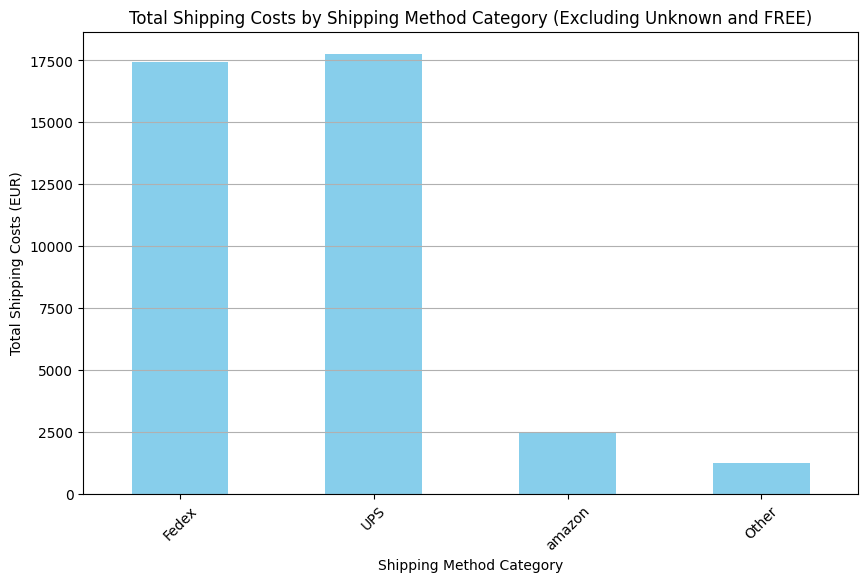

,Total Shipping Cost (EUR),Percentage of Total Shipping Cost (%)
Fedex,17423.15,44.785329
UPS,17770.30,45.677660
amazon,2481.46,6.378468
Other,1228.79,3.158543
Total,38903.70,100.000000


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Paid at' is treated as datetime
data['Paid at'] = pd.to_datetime(data['Paid at'], errors='coerce')

# Filter orders where Financial Status is paid and Paid at is on or before 2024-07-31
filtered_orders = data[(data['Financial Status'] == 'paid') & (data['Paid at'] <= '2024-07-31')]

# Categorize Shipping Method
def categorize_shipping_method(method):
    if pd.isna(method):
        return 'Unknown'
    method = method.lower()
    if method.startswith('fedex'):
        return 'Fedex'
    elif method.startswith('ups'):
        return 'UPS'
    elif method.startswith('standard'):
        return 'amazon'
    elif method.startswith('free'):
        return 'FREE'
    else:
        return 'Other'

# Apply the categorization to the filtered data
filtered_orders['Shipping Method Category'] = filtered_orders['Shipping Method'].apply(categorize_shipping_method)

# Verify the categorization
categorized_methods = filtered_orders['Shipping Method Category'].unique()

# Display the first few rows of the modified dataframe and unique categories
filtered_orders.head(), categorized_methods

# Remove rows with Shipping Method Category as 'Unknown' and 'FREE'
filtered_orders_valid = filtered_orders[~filtered_orders['Shipping Method Category'].isin(['Unknown', 'FREE'])]

# Group by Shipping Method Category and calculate the total shipping cost for each category
shipping_costs_valid = filtered_orders_valid.groupby('Shipping Method Category')['Shipping'].sum()

# Reorder the index to have Fedex, UPS, Amazon, and Other in the specified order
ordered_shipping_costs = shipping_costs_valid.reindex(['Fedex', 'UPS', 'amazon', 'Other'])

# Plot the shipping costs for each category
plt.figure(figsize=(10, 6))
ordered_shipping_costs.plot(kind='bar', color='skyblue')
plt.title('Total Shipping Costs by Shipping Method Category (Excluding Unknown and FREE)')
plt.xlabel('Shipping Method Category')
plt.ylabel('Total Shipping Costs (EUR)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

# Calculate and summarize shipping costs, reorder, and add total row in a shortened manner
total_shipping_costs = filtered_orders_valid.groupby('Shipping Method Category')['Shipping'].sum()
total_shipping_cost = total_shipping_costs.sum()
shipping_cost_summary = pd.DataFrame({
    'Total Shipping Cost (EUR)': total_shipping_costs,
    'Percentage of Total Shipping Cost (%)': (total_shipping_costs / total_shipping_cost) * 100
}).reindex(['Fedex', 'UPS', 'amazon', 'Other'])

# Add total row
total_row = pd.DataFrame({'Total Shipping Cost (EUR)': [total_shipping_cost], 'Percentage of Total Shipping Cost (%)': [100.0]}, index=['Total'])
ordered_shipping_cost_summary = pd.concat([shipping_cost_summary, total_row])

ordered_shipping_cost_summary



In [21]:

# Filter the data for only UPS shipping method category
ups_orders_corrected = filtered_orders[filtered_orders['Shipping Method Category'] == 'UPS']

# Calculate the total shipping cost per day for UPS
ups_daily_shipping_cost_corrected = ups_orders_corrected.groupby(ups_orders_corrected['Paid at'].dt.date)['Shipping'].sum()

# Convert the result to a DataFrame for better readability
ups_daily_shipping_cost_corrected_df = ups_daily_shipping_cost_corrected.reset_index()
ups_daily_shipping_cost_corrected_df.columns = ['Date', 'Total Shipping Cost (EUR)']

# Display the daily shipping costs for UPS
ups_daily_shipping_cost_corrected_df

,Date,Total Shipping Cost (EUR)
0,2024-07-01,955.87
1,2024-07-02,213.05
2,2024-07-03,528.24
3,2024-07-04,126.04
4,2024-07-05,231.21
5,2024-07-06,593.74
6,2024-07-07,270.63
7,2024-07-08,408.11
8,2024-07-09,649.90
9,2024-07-10,753.25
